In [2]:
!pip install geopandas
!pip install pandas
!pip install rasterio
!pip install earthpy
!pip install geopy
!pip install shapely
!pip install plotly

import csv
from geopy.geocoders import Nominatim

from shapely.geometry import Point, Polygon

import pandas as pd
import geopandas as gpd

import rasterio
from rasterio import mask

import matplotlib.pyplot as plt
import numpy as np

import earthpy.plot as ep

from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

import plotly.express as px
import json

In [10]:
#path = Data4Policy/Geospatial Data Science Internship/Datasets/telangana_fires.csv
df = pd.read_csv("telangana_fires.csv")

#extracting the value of latitudes and longitudes from the csv file
lats, longs = list(df['longitude']), list(df['latitude'])

#creating and inserting a column of co-ordinates in the csv file
coords = [Point(lat, lon) for lat,lon in zip(lats,longs)]

#adding a column years containg only the value of year rather than whole date
years = [str(date)[-2:] for date in list(df['acq_date'])]
df.insert(2, "coords",coords)
df.insert(3, "year",years)

print('df', df)

df        fireID  latitude                   coords year  longitude  brightness  \
0           0   18.3777  POINT (80.5314 18.3777)   15    80.5314       318.6   
1           1   17.5898  POINT (80.9893 17.5898)   15    80.9893       315.4   
2           2   17.6028  POINT (81.1612 17.6028)   15    81.1612       311.8   
3           3   17.5241  POINT (80.3135 17.5241)   15    80.3135       317.0   
4           4   17.7571  POINT (80.3404 17.7571)   15    80.3404       317.2   
...       ...       ...                      ...  ...        ...         ...   
18780   18780   18.3923  POINT (77.8257 18.3923)   21    77.8257       315.4   
18781   18781   18.4943  POINT (77.7611 18.4943)   21    77.7611       317.2   
18782   18782   18.4805  POINT (79.3012 18.4805)   21    79.3012       314.0   
18783   18783   17.9506  POINT (80.7815 17.9506)   21    80.7815       316.8   
18784   18784   18.0553  POINT (80.7812 18.0553)   21    80.7812       318.4   

       scan  track  acq_date  acq_ti

In [19]:
#url = "https://github.com/undpindia/Data4Policy/blob/main/Analytics%20Notebooks/Relative%20Wealth%20Index/Datasets/gadm40_IND_shp/gadm40_IND_3.shp"
url = 'gadm36_IND_shp/gadm36_IND_3.shp'
#data = india_administrative_boundries
data = gpd.read_file(url)

#all the data where the district is Telangana 
telan_data = data[data['NAME_1'] == 'Telangana'] 

#creating a list of district according to their latitdes and longitudes
dists=[]
for coord,year in zip(coords,years):
    print("year",year)
    dists.append(telan_data[telan_data['geometry'].contains(coord)]['NAME_2'].item() )
    
#print(dists)

 



hii
hii
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15
year 15


KeyboardInterrupt: 

adm_name,year,fire count

In [61]:
import json

#result shows the number of fire counts according to the year in each district
result=df.groupby(["year","adm_name"]).size().to_frame(name = 'fireCount').reset_index()
print(result)

#creating json file
output1 = result.to_json(orient = 'records')

with open('output1.json', 'w') as f:
    json.dump(output1,f)
#print(js)


   year     adm_name  fireCount
0    15     Adilabad        276
1    15    Hyderabad          1
2    15   Karimnagar        239
3    15      Khammam        684
4    15  Mahbubnagar        197
..  ...          ...        ...
62   21        Medak        132
63   21     Nalgonda         62
64   21    Nizamabad        181
65   21  Ranga Reddy        129
66   21     Warangal        484

[67 rows x 3 columns]


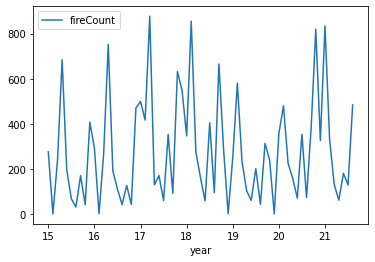

<Figure size 432x288 with 0 Axes>

In [84]:
import matplotlib.pyplot as plt

result.plot(kind='line',x='year',y='fireCount')
plt.show()
plt.savefig("output1")



      
